In [68]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline

In [ ]:
df = pd.read_csv(r'C:\Users\dell-pc\Downloads\netflix dataset\NetflixOriginals.csv', encoding='latin-1', index_col=0)

In [46]:
df.head()

,Genre,Premiere,Runtime,IMDB Score,Language
Title,,,,,
Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
The Open House,Horror thriller,"January 19, 2018",94,3.2,English
Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [47]:
df.isnull().sum()

Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [48]:
df.columns

Index(['Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [49]:
df['Premiere'].dtype

dtype('O')

In [50]:
df['Language'].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

C:\Users\dell-pc\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


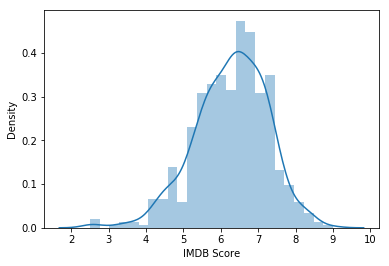

In [76]:
sns.distplot(df['IMDB Score'], kde=True, bins=25)

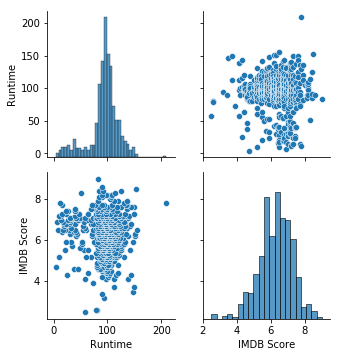

In [77]:
sns.pairplot(df)

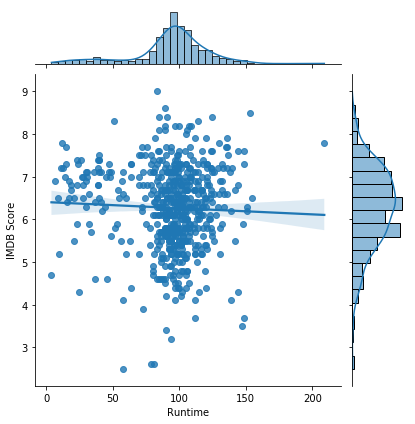

In [79]:
sns.jointplot(x='Runtime', y='IMDB Score', data=df, kind='reg')

In [91]:
#top5 imdb rated originals 

top5 = df[['IMDB Score', 'Language', 'Genre']].sort_values(by='IMDB Score',ascending=False)[:5]
top5

,IMDB Score,Language,Genre
Title,,,
David Attenborough: A Life on Our Planet,9.0,English,Documentary
Emicida: AmarElo - It's All For Yesterday,8.6,Portuguese,Documentary
Springsteen on Broadway,8.5,English,One-man show
Winter on Fire: Ukraine's Fight for Freedom,8.4,English/Ukranian/Russian,Documentary
Taylor Swift: Reputation Stadium Tour,8.4,English,Concert Film


In [93]:
grp_lang = top5.groupby('Language')

In [99]:
#avg imdb rating categorised by language

grp_lang.median()

,IMDB Score
Language,
English,8.5
English/Ukranian/Russian,8.4
Portuguese,8.6


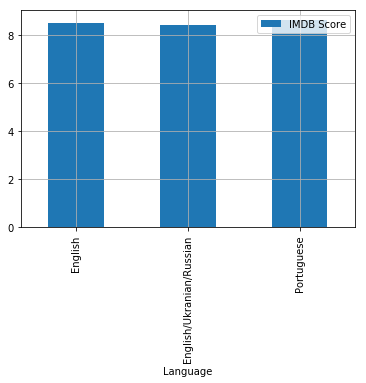

In [110]:
grp_lang.median().plot(kind='bar', grid=True)

In [100]:
grp_genre = top5.groupby('Genre')

In [104]:
grp_genre.median()

,IMDB Score
Genre,
Concert Film,8.4
Documentary,8.6
One-man show,8.5


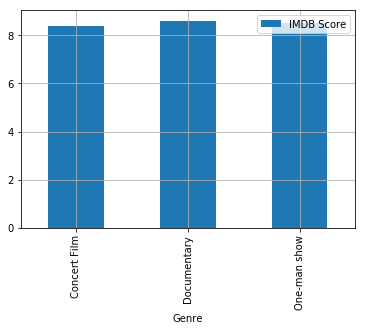

In [109]:
grp_genre.median().plot(kind='bar', grid=True)

In [111]:
grp_genre['Language'].value_counts()

Genre         Language                
Concert Film  English                     1
Documentary   English                     1
              English/Ukranian/Russian    1
              Portuguese                  1
One-man show  English                     1
Name: Language, dtype: int64